Лабораторная работа №3: Полином Лагранжа, апроксимация, интерполяция по первой и второй формулам Ньютона 

In [12]:
import csv
import numpy as np
import matplotlib.pyplot as plt

Задание №1: Считывание данных из csv файла и вывод в виде таблицы

In [13]:
# Задание 1
with open(r'13_Ханты-Мансийск.csv',  newline="", encoding="utf-8-sig") as f:
    reader = csv.reader(f)
    info = [row for row in reader]
max_leng = [max([len(str(row[i])) for row in info]) for i in range(len(info[0]))]
for row in info:
    print(" || ".join(str(row[i]).ljust(max_leng[i]) for i in range(len(row))))


Год  || янв   || фев   || мар   || апр   || май   || июн   || июл   || авг   || сен   || окт   || ноя   || дек   || средняя
1892 || 999.9 || 999.9 || 999.9 || 999.9 || 999.9 || 999.9 || 999.9 || 999.9 || 999.9 || 0.4   || -12.3 || 999.9 || 999.9  
1893 || 999.9 || 999.9 || -4.5  || 999.9 || 999.9 || 999.9 || 999.9 || 999.9 || 999.9 || 999.9 || 999.9 || 999.9 || 999.9  
1894 || 999.9 || 999.9 || 999.9 || 999.9 || 999.9 || 999.9 || 999.9 || 999.9 || 999.9 || 999.9 || 999.9 || -18.8 || 999.9  
1895 || -23.2 || 999.9 || 999.9 || 999.9 || 999.9 || 999.9 || 999.9 || 999.9 || 999.9 || 999.9 || 999.9 || 999.9 || 999.9  
1896 || 999.9 || 999.9 || 999.9 || 999.9 || 999.9 || 999.9 || 999.9 || 999.9 || 999.9 || 999.9 || 999.9 || 999.9 || 999.9  
1897 || -21.6 || -18.7 || -11.3 || -2.4  || 9.7   || 16.1  || 17    || 13.9  || 10.4  || -2.3  || -11.6 || -19.3 || -1.7   
1898 || -15.2 || -23.3 || -18.8 || -3.2  || 3.6   || 13.9  || 19.6  || 15.3  || 11    || -4.6  || -12.6 || -14.3 || -2.4   
1899 || 

Задание №2:Расчёт полинома Лагранжа для 12 последовательных значений температур

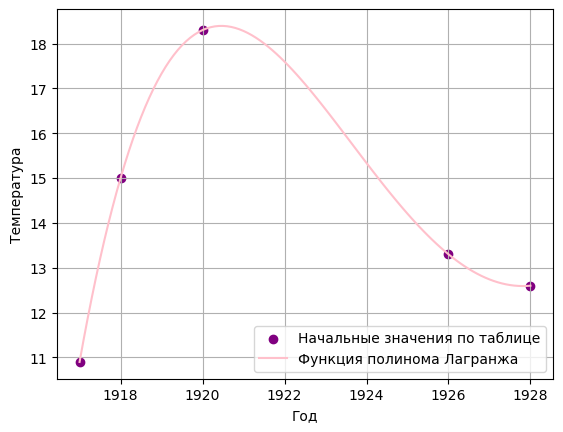

In [14]:
# Задание 2

# Для построения интерполяционного полинома Лагранжа возьмём столбец №6 - "июнь"
column = 6

# Выберем строки с 1918 по 1929 года
line_0 = 26 # первый элемент полинома
line = line_0 + 11 # 12 элемент полинома

x_i = []
y_i = []
for i in range(line_0, line + 1):
    if info[i][column] != "999.9":
        x_i.append(float(info[i][0]))
        y_i.append(float(info[i][column]))

x_min = min(x_i)
x_max = max(x_i)
# Шаг по оси Х
h = 0.1
# Создадим список с координатами x
x = []
value = x_min

# функция рассчёта полинома Лагранжа

def Lagrange_polynomial(x, x_i, y_xi):
    y = 0 # значение полинома Лагранжа
    for i in range(len(x_i)):
        p = 1 # полиномиальный коэффициент
        for j in range(len(x_i)):
            if i != j:
                p *= (x - x_i[j]) / (x_i[i] - x_i[j])
        y += p * y_xi[i]
    return y

while value <= x_max:
    x.append(value)
    value += h
y = [Lagrange_polynomial(xi, x_i, y_i) for xi in x]

# Построим график
plt.scatter(x_i, y_i, color="purple", label="Начальные значения по таблице")
plt.plot(x, y, color="pink", label="Функция полинома Лагранжа")
plt.xlabel("Год")
plt.ylabel("Температура")
plt.legend()
plt.grid()
plt.show()


Задание №3: Рассчёт интерполяции 6 последовательных точек по Первой формуле Ньютона 

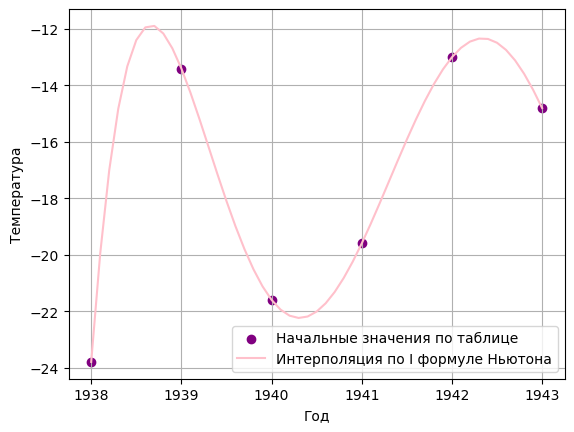

In [15]:
# Задание 3

# Интерполяцию выполним по столбцу "декабрь"
column = 12
# Выберем строки с 1938 по 1944 годы
line_0 = 47
line = line_0 + 5

x_i = []
y_i = []
for i in range(line_0, line + 1):
    if info[i][column] != "999.9":
        x_i.append(float(info[i][0]))
        y_i.append(float(info[i][column]))

# Шаг по оси Х
h = 0.1
x = []
y = []
interpol_x_I = x_i[0]

# Интерполяция по первой формуле Ньютона

def First_Newton(x_i, y_i, interpol_x_I):
    N = len(x_i)
    coeff = [y_i[0]]
    for j in range(1, N):
        dd = [(y_i[i] - y_i[i - 1]) / (x_i[i + j - 1] - x_i[i - 1]) for i in range(1, N - j + 1)]
        y_i = dd
        coeff.append(y_i[0])
    interpol_y_I = coeff[0]
    term = 1
    for j in range(1, N):
        term *= interpol_x_I - x_i[j - 1]
        interpol_y_I += coeff[j] * term
    return interpol_y_I

while interpol_x_I <= x_i[-1]:
    x.append(interpol_x_I)
    y.append(First_Newton(x_i, y_i, interpol_x_I))
    interpol_x_I += h

# Построим график
plt.scatter(x_i, y_i, color="purple", label="Начальные значения по таблице")
plt.plot(x, y, color="pink", label="Интерполяция по I формуле Ньютона")
plt.xlabel("Год")
plt.ylabel("Температура")
plt.legend()
plt.grid()
plt.show()

Задание №4: Рассчёт интерполяуии для 6 последовательных значений по второй формуле Ньютона 

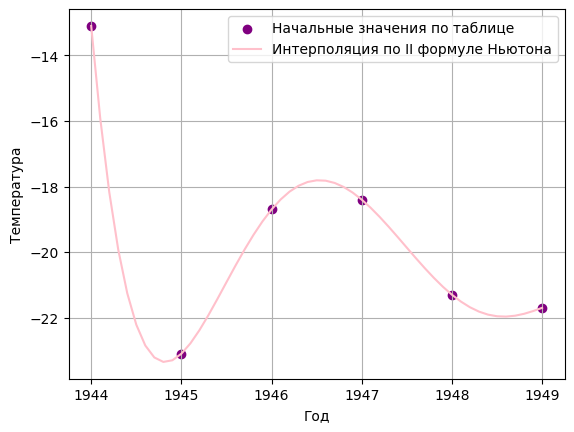

In [16]:
# Задание 4

# Интерполяцию по второй формуле Ньютона выполним по столбцу "декабрь"
column = 12
# Выберем строки с 1945 по 1950 годы
line_0 = 53
line = line_0 + 5

x_i = []
y_i = []
for i in range(line_0, line + 1):
    if info[i][column] != "999.9":
        x_i.append(float(info[i][0]))
        y_i.append(float(info[i][column]))

# Шаг по оси Х
h = 0.1
x = []
y = []
interpol_x_II = x_i[0]

# Интерполяция по второй формуле Ньютона

def Second_Newton(x_i, y_i, x):
    N = len(x_i)
    coeffs = []
    for i in range(N):
        coeffs.append(y_i[i])
    for j in range(1, N):
        for i in range(N - 1, j - 1, -1):
            coeffs[i] = (coeffs[i] - coeffs[i - 1]) / (x_i[i] - x_i[i - j])
    result = coeffs[N - 1]
    for i in range(N - 2, -1, -1):
        result = coeffs[i] + (x - x_i[i]) * result
    return result

while interpol_x_II <= x_i[-1]:
    x.append(interpol_x_II)
    y.append(Second_Newton(x_i, y_i, interpol_x_II))
    interpol_x_II += h

# Построим график
plt.scatter(x_i, y_i, color="purple", label="Начальные значения по таблице")
plt.plot(x, y, color="pink", label="Интерполяция по II формуле Ньютона")
plt.xlabel("Год")
plt.ylabel("Температура")
plt.legend()
plt.grid()
plt.show()

Задание №5: Рассчёт апроксимации с помощью степенного полинома

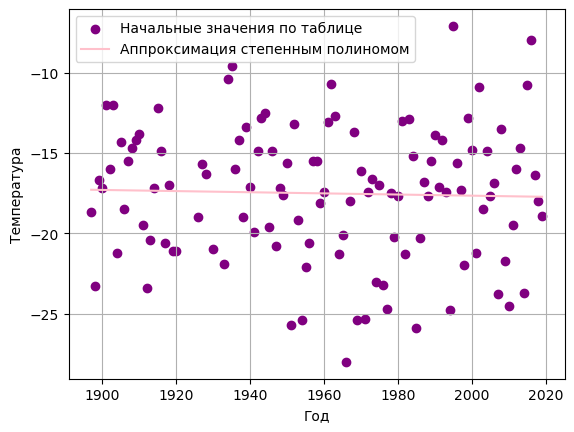

In [17]:
# Задание 5

# Апроксимация степенным полиномом

# Выполним апроксимацию по столбцу "февраль"

column = 2
x_i = []
y_i = []
for i in range(1, len(info)):
    if info[i][column] != "999.9":
        x_i.append(float(info[i][0]))
        y_i.append(float(info[i][column]))

N = len(x_i)
Sx = sum(x_i)
Sy = sum(y_i)
Sx2 = sum([x ** 2 for x in x_i])
Sxy = sum([x * y for x, y in zip(x_i, y_i)])
a = (N * Sxy - Sx * Sy) / (N * Sx2 - Sx ** 2)
b = (Sy - a * Sx) / N
Approx_y = [a * x + b for x in x_i]

# Построим график
plt.scatter(x_i, y_i, color="purple", label="Начальные значения по таблице")
plt.plot(x_i, Approx_y, color="pink", label="Аппроксимация степенным полиномом")
plt.xlabel("Год")
plt.ylabel("Температура")
plt.legend()
plt.grid()
plt.show()